In [ ]:
#    ____       _       _
#   |  _ \  ___| |_ __ | |__   __ _  ___
#   | | | |/ _ \ | '_ \| '_ \ / _` |/ _ \
#   | |_| |  __/ | |_) | | | | (_| |  __/
#   |____/ \___|_| .__/|_| |_|\__,_|\___|
#                |_|

In [144]:
%pylab inline
import scipy.optimize as opt

Populating the interactive namespace from numpy and matplotlib


## Define function and plot Numpy Polyfit versus Scipy Optimize

### define functione 'func'

In [145]:
def func(x, a,b):
    return a*x*x*np.exp(b*x)

### create the function with parameters a and b

In [146]:
a, b = 0.2, -0.8
x = np.linspace(-1, 5)
y = func(x, a,b)

### select random points (xs,ys) on func with bias

In [147]:
np.random.seed(1964)
sample = np.random.randint(len(x), size=10)
xs = x[sample]
ys = y[sample]
ys += np.random.normal(0, 0.01, size=len(ys))


### numpy: polynomial fit with degree = 3

In [148]:
deg = 3
coef = np.polyfit(xs, ys, deg=deg)
poly = np.poly1d(coef)
polyfit = poly(x)

### scipy: optimize curve fit 

In [149]:
parms, _ = opt.curve_fit(func, xs, ys)
funcfit = func(x, *parms)

### plot results

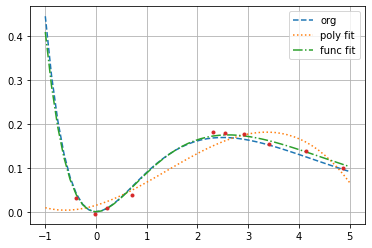

In [150]:
plt.plot(x, y, '--', label='org')
plt.plot(x, polyfit, ':', label='poly fit')
plt.plot(x, funcfit, '-.', label='func fit')
plt.plot(xs, ys, '.')
plt.grid();
plt.legend();

## Calculate Sum of Square Errors

### sum of square errors, by scipy optimze

In [151]:
funcerr = np.sum((func(xs, *parms) - ys)**2)

### sum of square errors by numpy polyfit

In [152]:
degs = [2, 3, 4, 5, 6, 7, 8]
errs = list()
for deg in degs:
    coef = np.polyfit(xs, ys, deg=deg)
    poly = np.poly1d(coef)
    errs.append(np.sum((poly(xs) - ys)**2))

### for degree > 4 polynominal fits better then optimized func

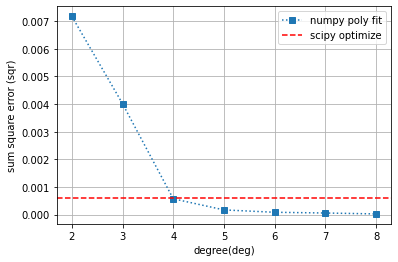

In [139]:
plt.plot(degs, errs, 's:', label='numpy poly fit')
plt.axhline(funcerr, color='red', linestyle='--', label='scipy optimize')
plt.grid();
plt.xlabel('degree(deg)')
plt.ylabel('sum square error (sqr)')
plt.legend();